Introduction to Market Basket Analysis in Python

http://pbpython.com/market-basket-analysis.html

In [1]:
!pip install mlxtend

In [2]:
import mlxtend

mlxtend.__version__

'0.23.4'

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
pd.__version__

'2.2.2'

In [5]:
bb_df = pd.read_csv("BB_2014.csv")
bb_df.head()

,SKU,Order,Delivery Date,Description
0,6883056,7998299,2014-04-23,Tide_Naturals Detergent Powder Lemon Chandan
1,6883056,6609767,2014-08-22,Tide_Naturals Detergent Powder Lemon Chandan
2,6883056,7963892,2014-05-05,Tide_Naturals Detergent Powder Lemon Chandan
3,6883056,7883032,2014-06-15,Tide_Naturals Detergent Powder Lemon Chandan
4,6883056,6474677,2014-09-25,Tide_Naturals Detergent Powder Lemon Chandan


In [6]:
len(bb_df.Order.unique())

32531

In [7]:
len(bb_df.SKU.unique())

6956

In [8]:
sku_desc_dict = dict(zip(bb_df.SKU, bb_df.Description))

In [9]:
len(sku_desc_dict)

6956

In [10]:
bb_df.drop( 'Description', axis = 1, inplace = True)

In [11]:
bb_df['Quantity'] = 1

In [12]:
bb_df.head()

,SKU,Order,Delivery Date,Quantity
0,6883056,7998299,2014-04-23,1
1,6883056,6609767,2014-08-22,1
2,6883056,7963892,2014-05-05,1
3,6883056,7883032,2014-06-15,1
4,6883056,6474677,2014-09-25,1


In [13]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142844 entries, 0 to 142843
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SKU            142844 non-null  int64 
 1   Order          142844 non-null  int64 
 2   Delivery Date  142844 non-null  object
 3   Quantity       142844 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.4+ MB


In [30]:
bb_pivot_df = bb_df.pivot( index='Order',
                          columns='SKU',
                          values = "Quantity" ).fillna(0.0).astype('float16').reset_index(drop=True)

In [31]:
bb_pivot_df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


SKU,6883056,15668519,15668520,15668521,15668541,15668542,15670123,15670144,15670145,15670146,...,93302183,93302184,93302186,93303345,93303349,93316685,93316921,93316922,93320243,108525199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
bb_pivot_df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


SKU,6883056,15668519,15668520,15668521,15668541,15668542,15670123,15670144,15670145,15670146,...,93302183,93302184,93302186,93303345,93303349,93316685,93316921,93316922,93320243,108525199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
bb_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Columns: 6956 entries, 6883056 to 108525199
dtypes: float16(6956)
memory usage: 431.6 MB


In [18]:
bb_pivot_df.shape

(32531, 6956)

In [19]:
frequent_itemsets = apriori(bb_pivot_df,
                            min_support=0.003,
                            use_colnames=True)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [20]:
frequent_itemsets.tail(10)

,support,itemsets
273,0.003013,"(34994313, 15670251)"
274,0.004365,"(15670251, 34994319)"
275,0.008146,"(34934493, 34936518)"
276,0.003013,"(34935354, 34936518)"
277,0.007162,"(34994312, 34994319)"
278,0.003289,"(34994313, 34994319)"
279,0.003197,"(34995028, 34995070)"
280,0.003105,"(93141022, 93141023)"
281,0.003474,"(93141092, 93141022)"
282,0.004119,"(93141092, 93141023)"


In [21]:
import matplotlib.pyplot as plt

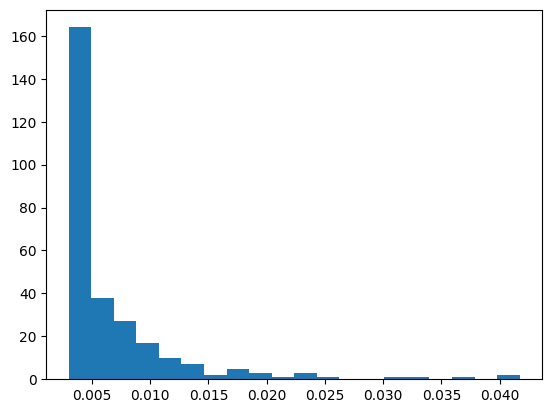

In [22]:
plt.hist(frequent_itemsets.support, bins = 20);

In [23]:
rules = association_rules(frequent_itemsets,
                          metric="lift",
                          min_threshold=1)
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(15670251),(15670157),0.031891,0.007778,0.003566,0.111813,14.375300,1.0,0.003318,1.117132,0.961086,0.098768,0.104851,0.285127
1,(15670157),(15670251),0.007778,0.031891,0.003566,0.458441,14.375300,1.0,0.003318,1.787633,0.937730,0.098768,0.440601,0.285127
2,(34994312),(15670251),0.013924,0.031891,0.003566,0.256099,8.030476,1.0,0.003122,1.301395,0.887836,0.084401,0.231594,0.183956
3,(15670251),(34994312),0.031891,0.013924,0.003566,0.111813,8.030476,1.0,0.003122,1.110213,0.904314,0.084401,0.099272,0.183956
4,(34994313),(15670251),0.013741,0.031891,0.003013,0.219243,6.874775,1.0,0.002574,1.239961,0.866446,0.070685,0.193523,0.156853
5,(15670251),(34994313),0.031891,0.013741,0.003013,0.094463,6.874775,1.0,0.002574,1.089143,0.882690,0.070685,0.081847,0.156853
6,(15670251),(34994319),0.031891,0.017578,0.004365,0.136875,7.786675,1.0,0.003804,1.138215,0.900286,0.096778,0.121432,0.192599
7,(34994319),(15670251),0.017578,0.031891,0.004365,0.248324,7.786675,1.0,0.003804,1.287934,0.887170,0.096778,0.223563,0.192599
8,(34934493),(34936518),0.033905,0.023392,0.008146,0.240262,10.271222,1.0,0.007353,1.285453,0.934319,0.165737,0.222064,0.294254
9,(34936518),(34934493),0.023392,0.033905,0.008146,0.348246,10.271222,1.0,0.007353,1.482300,0.924261,0.165737,0.325373,0.294254


In [24]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         24 non-null     object 
 1   consequents         24 non-null     object 
 2   antecedent support  24 non-null     float64
 3   consequent support  24 non-null     float64
 4   support             24 non-null     float64
 5   confidence          24 non-null     float64
 6   lift                24 non-null     float64
 7   representativity    24 non-null     float64
 8   leverage            24 non-null     float64
 9   conviction          24 non-null     float64
 10  zhangs_metric       24 non-null     float64
 11  jaccard             24 non-null     float64
 12  certainty           24 non-null     float64
 13  kulczynski          24 non-null     float64
dtypes: float64(12), object(2)
memory usage: 2.8+ KB


In [25]:
def get_sku_description( skus ):
    all_skus = []
    for sku in skus:
         all_skus.append(sku_desc_dict[sku])
    return ",".join(all_skus)

In [26]:
rules.antecedents[0]

frozenset({15670251})

In [27]:
rules['antecedents_desc'] = rules.antecedents.map(lambda rec: sku_desc_dict[list(rec)[0]])

In [28]:
rules['consequents_desc'] = rules.consequents.map(lambda rec: sku_desc_dict[list(rec)[0]])

In [29]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_desc,consequents_desc
12,(34994312),(34994319),0.013924,0.017578,0.007162,0.514405,29.263955,1.0,0.006918,2.023132,0.979466,0.294272,0.505717,0.460933,TVS Organics_Potato,TVS Organics_Onion Regular
22,(93141092),(93141023),0.008759,0.010605,0.004119,0.470300,44.347644,1.0,0.004026,1.867842,0.986088,0.270210,0.464623,0.429361,Danone_Yoghurt Mango Flavour,Danone_Yoghurt Strawberry Flavour
1,(15670157),(15670251),0.007778,0.031891,0.003566,0.458441,14.375300,1.0,0.003318,1.787633,0.937730,0.098768,0.440601,0.285127,Gopalan Organic_Bhindi,Gopalan Organic_Spinach
21,(93141022),(93141092),0.008362,0.008759,0.003474,0.415413,47.429488,1.0,0.003400,1.695628,0.987171,0.254537,0.410248,0.406005,Danone_Yoghurt Vanilla Flavour,Danone_Yoghurt Mango Flavour
13,(34994319),(34994312),0.017578,0.013924,0.007162,0.407461,29.263955,1.0,0.006918,1.664154,0.983109,0.294272,0.399094,0.460933,TVS Organics_Onion Regular,TVS Organics_Potato
20,(93141092),(93141022),0.008759,0.008362,0.003474,0.396597,47.429488,1.0,0.003400,1.643409,0.987566,0.254537,0.391509,0.406005,Danone_Yoghurt Mango Flavour,Danone_Yoghurt Vanilla Flavour
23,(93141023),(93141092),0.010605,0.008759,0.004119,0.388421,44.347644,1.0,0.004026,1.620790,0.987928,0.270210,0.383017,0.429361,Danone_Yoghurt Strawberry Flavour,Danone_Yoghurt Mango Flavour
18,(93141022),(93141023),0.008362,0.010605,0.003105,0.371299,35.012124,1.0,0.003016,1.573712,0.979630,0.195735,0.364560,0.332032,Danone_Yoghurt Vanilla Flavour,Danone_Yoghurt Strawberry Flavour
9,(34936518),(34934493),0.023392,0.033905,0.008146,0.348246,10.271222,1.0,0.007353,1.482300,0.924261,0.165737,0.325373,0.294254,Fab 360_Fabric Washing Liquid,Bingo_Yumitos Original Style Salt Sprinkled
16,(34995028),(34995070),0.009773,0.010727,0.003197,0.327112,30.494487,1.0,0.003092,1.470190,0.976753,0.184760,0.319816,0.312571,Ambrosia_Capsicum Green,Ambrosia_Ladies Finger
